# ASL Classification with a CNN

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Get reproducible results
random_state = 46
tf.random.set_seed(random_state)

Using TensorFlow backend.


## GPU configuration
If you have a GPU, enable experimental memory growth.

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


## File Paths

In [3]:
train_dir = "asl_alphabet_train/asl_alphabet_train"
test_dir = "asl_alphabet_test/asl_alphabet_test"

## Train model

In [4]:
def fit_model(model):
    
    print("Defining train data generator...")
    datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,
        featurewise_std_normalization=False,
        rotation_range=30,
        validation_split=0.30)
    
    train_generator = datagen.flow_from_directory(
        train_dir,
        subset='training',
        target_size=(200, 200),
        batch_size=128,
        class_mode='sparse'
    )
    
    val_generator = datagen.flow_from_directory(
        train_dir,
        subset='validation',
        target_size=(200, 200),
        batch_size=128,
        class_mode='sparse'
    )
    
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    model.summary()
    
    print('Fitting model...')
    history = model.fit(train_generator, 
        steps_per_epoch=100, 
        epochs=20, 
        verbose=1, 
        validation_data=val_generator, 
        validation_steps=50)
    
    print('Evaluating model...')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    
    del model
    K.clear_session()
    
def fit_with_base_model(base_model, trainable = False):
    base_model.trainable = trainable
    fit_model(tf.keras.models.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(29)
    ]))
    

# Base models

## InceptionResNetV2
This model uses InceptionV3 as a base model initialized with the ImageNet weights.  

Defining train data generator...
Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, None, None, 1536)  54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3741      
Total params: 54,537,213
Trainable params: 200,477
Non-trainable params: 54,336,736
_________________________________________________

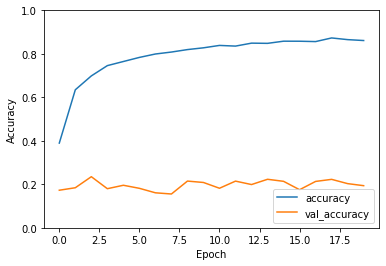

In [5]:
fit_with_base_model(tf.keras.applications.InceptionResNetV2(include_top=False, weights='imagenet'))

## InceptionV3
This model uses InceptionV3 as a base model initialized with the ImageNet weights.  

Defining train data generator...
Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3741      
Total params: 22,068,797
Trainable params: 266,013
Non-trainable params: 21,802,784
_________________________________________________

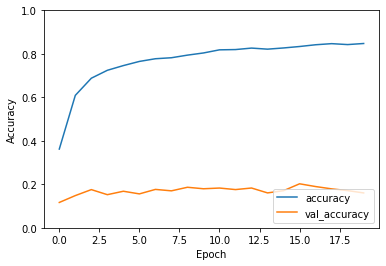

In [5]:
fit_with_base_model(tf.keras.applications.InceptionV3(include_top=False, weights='imagenet'))


## MobileNet
This model uses MobileNet as a base model initialized with the ImageNet weights.  

/home/jeremy/.local/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Defining train data generator...
Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3741      
Total params: 3,363,805
Trainable params: 134,941
Non-trainable params: 3,228,864
___________________________________________________

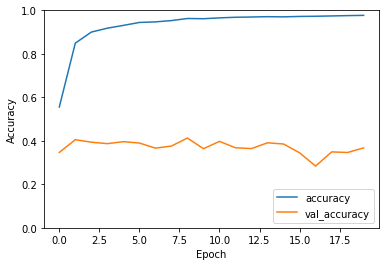

In [6]:
fit_with_base_model(tf.keras.applications.MobileNet(include_top=False, weights='imagenet'))


## MobileNetV2
This model uses MobileNetV2 as a base model initialized with the ImageNet weights.  

/home/jeremy/.local/lib/python3.7/site-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Defining train data generator...
Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, None, None, 1280)  2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3741      
Total params: 2,425,693
Trainable params: 167,709
Non-trainable params: 2,257,984
___________________________________________________

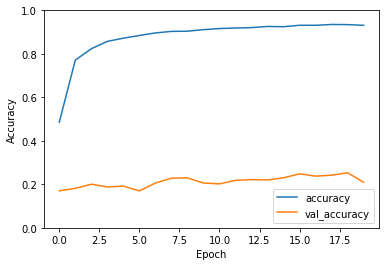

In [7]:
fit_with_base_model(tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet'))

## ResNet50
This model uses ResNet50 as a base model initialized with the ImageNet weights.  

Defining train data generator...
Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3741      
Total params: 23,853,725
Trainable params: 266,013
Non-trainable params: 23,587,712
_________________________________________________

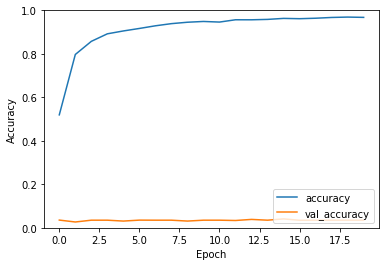

In [5]:
fit_with_base_model(tf.keras.applications.ResNet50(include_top=False, weights='imagenet'))

## ResNet50V2
This model uses ResNet50V2 as a base model initialized with the ImageNet weights.  

Defining train data generator...
Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3741      
Total params: 23,853,725
Trainable params: 266,013
Non-trainable params: 23,587,712
_________________________________________________

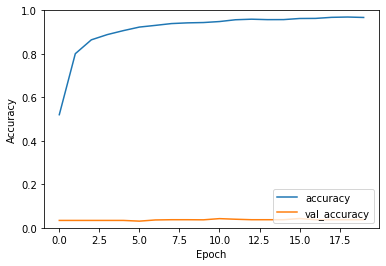

In [6]:
fit_with_base_model(tf.keras.applications.ResNet50(include_top=False, weights='imagenet'))

## VGG16
This model uses VGG16 as a base model initialized with the ImageNet weights.  

Defining train data generator...
Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3741      
Total params: 14,784,093
Trainable params: 69,405
Non-trainable params: 14,714,688
__________________________________________________

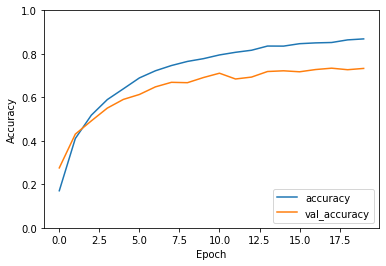

In [7]:
fit_with_base_model(tf.keras.applications.VGG16(include_top=False, weights='imagenet'))

## VGG19
This model uses VGG19 as a base model initialized with the ImageNet weights.  

Defining train data generator...
Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, None, None, 512)   20024384  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3741      
Total params: 20,093,789
Trainable params: 69,405
Non-trainable params: 20,024,384
__________________________________________________

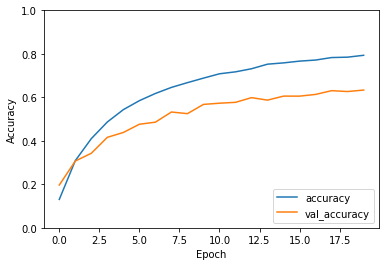

In [8]:
fit_with_base_model(tf.keras.applications.VGG19(include_top=False, weights='imagenet'))

### In case, a kernel is interrupted, to free up GPU memory, run:

In [ ]:
try: 
    del model
except NameError: model = None

K.clear_session()